In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from datetime import datetime

# Introduction to the dataset.

This is a part of my on-campus job as a Conway Center intern. Conway Center houses the Bloomberg Terminal, which is an information services tool that provides data on financial, economic, government, and environmental data. Since there is only 1 Bloomberg Terminal on campus, users must book an appointment via calendly. This CSV file is pooled from Calendly that keep tracks of how many signed up for the individual sessions (aka use the tool on their own) or peer mentoring appointments


In [2]:
link = "events-export.csv"
pd.read_csv(link).head()

,User Name,Team,Invitee Name,Invitee First Name,Invitee Last Name,Invitee Email,Invitee Time Zone,Invitee accepted marketing emails,Text Reminder Number,Event Type Name,...,Guest Email(s),Invitee Reconfirmed,Marked as No-Show,Meeting Notes,Group,User Email,Event UUID,Invitee UUID,Invitee scheduled by,Scheduling method
0,Conway Center,NaN,test,test,NaN,jwkennedy@smith.edu,Eastern Time - US & Canada,NaN,NaN,Bloomberg Terminal,...,NaN,NaN,No,NaN,NaN,ciec@smith.edu,DESAHSTCPNPU2GFD,BEWJEC3D7ZTGL6RC,NaN,NaN
1,Conway Center,NaN,test,test,NaN,jwkennedy@smith.edu,Eastern Time - US & Canada,NaN,NaN,Bloomberg Terminal,...,NaN,NaN,No,NaN,NaN,ciec@smith.edu,EDWAHXWCNJ4CR2YT,CFRLHE3AY544OZJB,NaN,NaN
2,Conway Center,NaN,NAGE NGO,NAGE,NGO,nngo@smith.edu,Eastern Time - US & Canada,NaN,NaN,Bloomberg Terminal,...,NaN,NaN,No,NaN,NaN,ciec@smith.edu,AAUEBYZLIBGAAPSL,BBTMFQPRXGKE5ILK,NaN,NaN
3,Conway Center,NaN,Nage Ngo,Nage,Ngo,nngo@smith.edu,Eastern Time - US & Canada,NaN,NaN,Bloomberg Terminal,...,NaN,NaN,No,NaN,NaN,ciec@smith.edu,EFQHBY6INHBHZC6W,EDQNBXJRWBJKXUYA,NaN,NaN
4,Conway Center,NaN,Nage Ngo,Nage,Ngo,nngo@smith.edu,Eastern Time - US & Canada,NaN,NaN,Bloomberg Terminal,...,NaN,NaN,No,NaN,NaN,ciec@smith.edu,HCRAKIZJC5TOJNUQ,CHXKOG2OIBH5GWGJ,NaN,NaN


The activites are recorded under column "Event Type Name". "Bloomberg Terminal" means individual sessions whereas "Bloomberg Peer Mentoring" means the peer-mentoring. 

# My codes

## Attributes
The internal attributes are event (as described above), ending and beginning date of the dataset (to help with the title of the plot). 

## Methods
* My first method clean() cleans and converts string to datetime column.
* My second method narrow() receives the output from the clean() method, filters the dataset for the event of interest and counts number of users (or hours) by month
* My last method works on the output from narrow() to plot the bar chart

In [3]:
class BloombergReport:
    def __init__(self,link,event,year):
        self.link = link
        self.event = event
        self.year = year
        
    def clean(self):
        data = pd.read_csv(link)
        
        # There are many columns but we are only choosing those of interest
        clean_data = data[["Invitee Email","Start Date & Time","Event Type Name"]]
        
        # Clean the date time column by converting from string to datetime format 
        clean_data.loc[:,'Start Date & Time'] =  pd.to_datetime(clean_data.loc[:,'Start Date & Time'], 
                                                                format='%Y-%m-%d %I:%M %p')
        clean_data.loc[:,"Month"] = clean_data.loc[:,"Start Date & Time"].dt.month
        clean_data.loc[:,"Year"] = clean_data.loc[:,"Start Date & Time"].dt.year
        
        return clean_data 
    
    def narrow(self):
        # Choose an event of interest
        clean_data = self.clean()
        mask = (clean_data.loc[:,"Event Type Name"] == self.event) & (clean_data.loc[:,"Year"] == self.year)
        new_data = clean_data[mask]        
                
        # We are getting these internal attributes to reference them later when drawing the graph
        self.start_month = min(new_data.loc[:,"Month"])
        self.end_month = max(new_data.loc[:,"Month"])
        self.start_year = min(new_data.loc[:,"Year"])
        self.end_year = max(new_data.loc[:,"Year"])
        
        # Group by month and count usage
        new_data = new_data.groupby(['Month'],as_index = False)["Invitee Email"].count()
        return new_data
    
    def graph(self):
        new_data = self.narrow()
        
        # plot a bar chart
        sns.barplot(
            x="Month", 
            y="Invitee Email", 
            data=new_data, 
            ci=None, 
            color='#69b3a2').set(title=f"{self.event} from {self.start_month}/{self.start_year} to {self.end_month}/{self.end_year}", 
                                 xlabel='', 
                                 ylabel='Number of Hours')

# Examples
I can change the year and the event I'm interested in

In [4]:
PeerMentoring = BloombergReport(link, "Bloomberg Peer Mentoring",2023)

/opt/jupyterhub/lib/python3.8/site-packages/pandas/core/indexing.py:1951: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[selected_item_labels] = value
/opt/jupyterhub/lib/python3.8/site-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


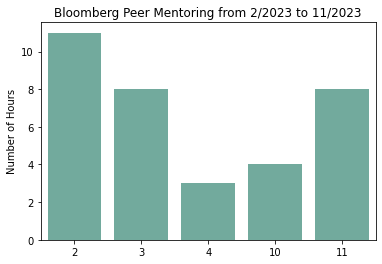

In [5]:
PeerMentoring.graph()

/opt/jupyterhub/lib/python3.8/site-packages/pandas/core/indexing.py:1951: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[selected_item_labels] = value
/opt/jupyterhub/lib/python3.8/site-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


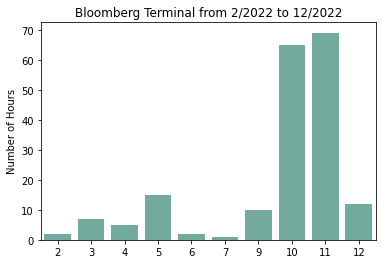

In [6]:
Bloomberg = BloombergReport(link, "Bloomberg Terminal",2022)
Bloomberg.graph()

/opt/jupyterhub/lib/python3.8/site-packages/pandas/core/indexing.py:1951: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[selected_item_labels] = value
/opt/jupyterhub/lib/python3.8/site-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


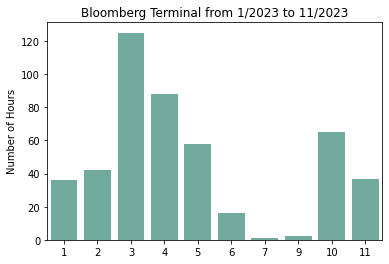

In [7]:
Bloomberg = BloombergReport(link, "Bloomberg Terminal",2023)
Bloomberg.graph()